# Feb 9th 2020 

### Pivot Table

In [1]:
import pandas as pd
pv = pd.read_csv('weather.csv')
print(pv)

       date      city  temperature  humidity
0  5/1/2017  new york           65        56
1  5/2/2017  new york           66        58
2  5/3/2017  new york           68        60
3  5/1/2017    mumbai           75        80
4  5/2/2017    mumbai           78        83
5  5/3/2017    mumbai           82        85
6  5/1/2017   beijing           80        26
7  5/2/2017   beijing           77        30
8  5/3/2017   beijing           79        35


In [11]:
pv.pivot(index ="city", columns ='date', values = "humidity")

date,5/1/2017,5/2/2017,5/3/2017
city,,,
beijing,26,30,35
mumbai,80,83,85
new york,56,58,60


___

In [17]:
df=pd.read_csv('weather_2.csv')
df.tail()

,date,city,temperature,humidity
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [24]:
df.pivot_table(index='city', columns='date', aggfunc='sum', margins=True)

humidity               temperature              
date     5/1/2017 5/2/2017  All    5/1/2017 5/2/2017  All
city                                                     
mumbai        163      111  274         153      162  315
new york      110      122  232         126      142  268
All           273      233  506         279      304  583

___

In [25]:
grp = pd.read_csv('weather_3.csv')
grp

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


In [29]:
grp['date']=pd.to_datetime(grp.date)

In [33]:
type(grp['date'])

pandas.core.series.Series

In [32]:
type(grp['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [37]:
grp.pivot_table(index=pd.Grouper(freq='M', key='date'),columns='city')

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


In [2]:
import pandas
pandas.__version__

'1.0.1'

In [6]:
pandas.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.6.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.1
numpy            : 1.18.1
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 45.2.0.post20200210
Cython           : 0.29.15
pytest           : 5.3.5
hypothesis       : 5.4.1
sphinx           : 2.4.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.7
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.1
IPython          : 7.12.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : 1.3.1
fastparquet      : None
gcsfs            : None
lxml.etree       :

## Pandas Crosstab Explained

In [7]:
import pandas as pd
import seaborn as sns

In [10]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df_raw = pd.read_csv("crosstab_data.csv",
                     header=None, names=headers, na_values="?" )

# Define a list of models that we want to review
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

# Create a copy of the data with only the top 8 manufacturers
df = df_raw[df_raw.make.isin(models)].copy()

In [11]:
pd.crosstab(df.make, df.body_style)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


In [13]:
# Same thing can be done using groupby function
df.groupby(['make', 'body_style'])['body_style'].count().unstack().fillna(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.0,7.0,5.0,1.0
mazda,0.0,0.0,10.0,7.0,0.0
mitsubishi,0.0,0.0,9.0,4.0,0.0
nissan,0.0,1.0,5.0,9.0,3.0
subaru,0.0,0.0,3.0,5.0,4.0
toyota,1.0,3.0,14.0,10.0,4.0
volkswagen,1.0,0.0,1.0,9.0,1.0
volvo,0.0,0.0,0.0,8.0,3.0


In [14]:
# It is also possible to do something similar using a pivot_table
df.pivot_table(index='make', columns='body_style', aggfunc={'body_style':len}, fill_value=0)

body_style                              
body_style convertible hardtop hatchback sedan wagon
make                                                
honda                0       0         7     5     1
mazda                0       0        10     7     0
mitsubishi           0       0         9     4     0
nissan               0       1         5     9     3
subaru               0       0         3     5     4
toyota               1       3        14    10     4
volkswagen           1       0         1     9     1
volvo                0       0         0     8     3

## Diving Deeper into the Crosstab

In [15]:
# Adding total value using margins
pd.crosstab(df.make, df.num_doors, margins=True, margins_name="Total")

num_doors,four,two,Total
make,,,
honda,5,8,13
mazda,7,9,16
mitsubishi,4,9,13
nissan,9,9,18
subaru,9,3,12
toyota,18,14,32
volkswagen,8,4,12
volvo,11,0,11
Total,71,56,127


In [16]:
# And some aggregation functions
pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,NaN,NaN,1970.0,2289.0,2024.0
mazda,NaN,NaN,2254.0,2361.0,NaN
mitsubishi,NaN,NaN,2377.0,2394.0,NaN
nissan,NaN,2008.0,2740.0,2238.0,2452.0
subaru,NaN,NaN,2137.0,2314.0,2454.0
toyota,2975.0,2585.0,2370.0,2338.0,2708.0
volkswagen,2254.0,NaN,2221.0,2342.0,2563.0
volvo,NaN,NaN,NaN,3023.0,3078.0


In [17]:
# Looking in terms of Percentage
pd.crosstab(df.make, df.body_style, normalize=True)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.054688,0.039062,0.007812
mazda,0.000000,0.000000,0.078125,0.054688,0.000000
mitsubishi,0.000000,0.000000,0.070312,0.031250,0.000000
nissan,0.000000,0.007812,0.039062,0.070312,0.023438
subaru,0.000000,0.000000,0.023438,0.039062,0.031250
toyota,0.007812,0.023438,0.109375,0.078125,0.031250
volkswagen,0.007812,0.000000,0.007812,0.070312,0.007812
volvo,0.000000,0.000000,0.000000,0.062500,0.023438


In [18]:
# The normalize parameter is even smarter because 
# it allows us to perform this summary on just the 
# columns or rows. For example, if we want to see how the body styles are distributed across makes:

pd.crosstab(df.make, df.body_style, normalize='columns')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.00,0.142857,0.087719,0.0625
mazda,0.0,0.00,0.204082,0.122807,0.0000
mitsubishi,0.0,0.00,0.183673,0.070175,0.0000
nissan,0.0,0.25,0.102041,0.157895,0.1875
subaru,0.0,0.00,0.061224,0.087719,0.2500
toyota,0.5,0.75,0.285714,0.175439,0.2500
volkswagen,0.5,0.00,0.020408,0.157895,0.0625
volvo,0.0,0.00,0.000000,0.140351,0.1875


  `We can do the same thing row-wise:`

In [19]:
pd.crosstab(df.make, df.body_style, normalize='index')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.538462,0.384615,0.076923
mazda,0.000000,0.000000,0.588235,0.411765,0.000000
mitsubishi,0.000000,0.000000,0.692308,0.307692,0.000000
nissan,0.000000,0.055556,0.277778,0.500000,0.166667
subaru,0.000000,0.000000,0.250000,0.416667,0.333333
toyota,0.031250,0.093750,0.437500,0.312500,0.125000
volkswagen,0.083333,0.000000,0.083333,0.750000,0.083333
volvo,0.000000,0.000000,0.000000,0.727273,0.272727


In [20]:
# This view of the data shows that of the Mitsubishi cars in this dataset,
# 69.23% are hatchbacks and the remainder (30.77%) are sedans.

`One of the most useful features of the crosstab is that you can pass in multiple dataframe columns and pandas does all the grouping for you. For instance, if we want to see how the data is distributed by front wheel drive (fwd) and rear wheel drive (rwd), we can include the drive_wheels column by including it in the list of valid columns in the second argument to the crosstab`

In [21]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels])

body_style   convertible     hardtop     hatchback         sedan          \
drive_wheels         fwd rwd     fwd rwd       4wd fwd rwd   4wd fwd rwd   
make                                                                       
honda                  0   0       0   0         0   7   0     0   5   0   
mazda                  0   0       0   0         0   6   4     0   5   2   
mitsubishi             0   0       0   0         0   9   0     0   4   0   
nissan                 0   0       1   0         0   2   3     0   9   0   
subaru                 0   0       0   0         1   2   0     2   3   0   
toyota                 0   1       0   3         0   8   6     0   7   3   
volkswagen             1   0       0   0         0   1   0     0   9   0   
volvo                  0   0       0   0         0   0   0     0   0   8   

body_style   wagon          
drive_wheels   4wd fwd rwd  
make                        
honda            0   1   0  
mazda            0   0   0  
mitsubishi       0   0   0  
nissan           0   3   0  
subaru           2   2   0  
toyota           2   1   1  
volkswagen       0   1   0  
volvo            0   0   3

`We can also do the same thing with the index:`

In [22]:
pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels],
            rownames=['Auto Manufacturer', "Doors"],
            colnames=['Body Style', "Drive Type"],
            dropna=False)

Body Style              convertible         hardtop         hatchback          \
Drive Type                      4wd fwd rwd     4wd fwd rwd       4wd fwd rwd   
Auto Manufacturer Doors                                                         
honda             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   7   0   
mazda             four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   0   0         0   5   4   
mitsubishi        four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   9   0   
nissan            four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   1   0         0   1   3   
subaru            four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         1   2   0   
toyota            four            0   0   0       0   0   0         0   6   0   
                  two             0   0   1       0   0   3         0   2   6   
volkswagen        four            0   0   0       0   0   0         0   0   0   
                  two             0   1   0       0   0   0         0   1   0   
volvo             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   0   0   

Body Style              sedan         wagon          
Drive Type                4wd fwd rwd   4wd fwd rwd  
Auto Manufacturer Doors                              
honda             four      0   4   0     0   1   0  
                  two       0   1   0     0   0   0  
mazda             four      0   4   2     0   0   0  
                  two       0   0   0     0   0   0  
mitsubishi        four      0   4   0     0   0   0  
                  two       0   0   0     0   0   0  
nissan            four      0   5   0     0   3   0  
                  two       0   4   0     0   0   0  
subaru            four      2   3   0     2   2   0  
                  two       0   0   0     0   0   0  
toyota            four      0   7   1     2   1   1  
                  two       0   0   2     0   0   0  
volkswagen        four      0   7   0     0   1   0  
                  two       0   2   0     0   0   0  
volvo             four      0   0   8     0   0   3  
                  two       0   0   0     0   0   0

**Visualizing**

For the final example, I will bring it all together by showing how the output of the crosstab can be passed to a seaborn heatmap in order to visually summarize the data.

In our last table, we ended up with a table of 240 values. This is too dense to quickly analyze but if we use a heatmap, we can easily interpret the data. Fortunately, seaborn can take the output from the crosstab and visualize it:

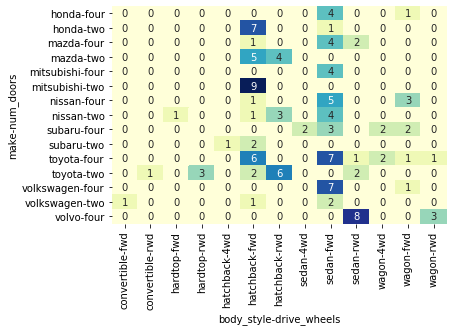

In [23]:
sns.heatmap(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]),
            cmap="YlGnBu", annot=True, cbar=False)

## Pivot table

In [26]:
df = pd.read_excel("sales-funnel.xlsx")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'sales-funnel.xlsx'